In [8]:
import pandas as pd

data = {
    'Day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Decision': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
print(df)

    Day   Outlook  Temp Humidity    Wind Decision
0     1     Sunny   Hot     High    Weak       No
1     2     Sunny   Hot     High  Strong       No
2     3  Overcast   Hot     High    Weak      Yes
3     4      Rain  Mild     High    Weak      Yes
4     5      Rain  Cool   Normal    Weak      Yes
5     6      Rain  Cool   Normal  Strong       No
6     7  Overcast  Cool   Normal  Strong      Yes
7     8     Sunny  Mild     High    Weak       No
8     9     Sunny  Cool   Normal    Weak      Yes
9    10      Rain  Mild   Normal    Weak      Yes
10   11     Sunny  Mild   Normal  Strong      Yes
11   12  Overcast  Mild     High  Strong      Yes
12   13  Overcast   Hot   Normal    Weak      Yes
13   14      Rain  Mild     High  Strong       No


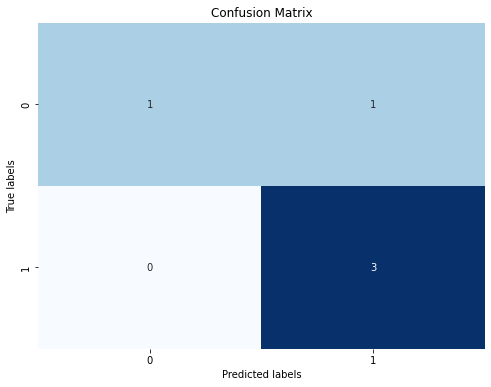


Accuracy: 0.8
Error: 0.19999999999999996
Precision: 0.85
Recall: 0.8
F1 Score: 0.7809523809523808


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset


# One-hot encode categorical variables
df_encoded = pd.get_dummies(df.drop(columns=['Day']))

# Encode target variable
le = LabelEncoder()
df_encoded['Decision'] = le.fit_transform(df['Decision'])

# Split dataset into features and target variable
X = df_encoded.drop(columns=['Decision'])
y = df_encoded['Decision']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nAccuracy:", accuracy)
print("Error:", error)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9666666666666667
Error: 0.033333333333333326
Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1 Score: 0.9666666666666667


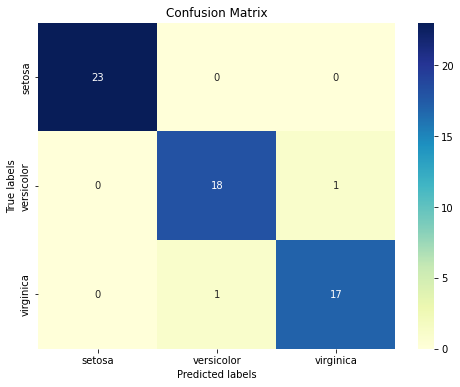

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict the classes for test set
y_pred = nb_classifier.predict(X_test)

# Evaluate classifier performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nAccuracy:", accuracy)
print("Error:", error)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()